In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

sns.set_style("ticks")
# sns.set_style("white")
# sns.set_style("whitegrid")

In [3]:
photoz_table = pd.read_csv("Fields-DR3/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'odds', 'PROB_GAL'])

specz_table = pd.read_csv("hydra_specz.csv", usecols=['RA_1', 'DEC_1', 'z', 'PROB_GAL'])

In [4]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]

ra_sz = specz_table["RA_1"]
dec_sz = specz_table["DEC_1"]
z = specz_table["z"]
probgal_sz = specz_table["PROB_GAL"]

In [5]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances_pz = dist(ra_pz, dec_pz)
distances_sz = dist(ra_sz, dec_sz)

In [6]:
for odds_min in [0.7, 0.8]:
    t = []
    for photoz_max in [0.03, 0.04, 0.05, 0.06]:
        
        mask_pz = (distances_pz < 5*radius) & (zml > 0.0) & (zml < photoz_max) & (odds > odds_min) & (prob_gal > 0.8)
        mask_sz = (distances_sz < 5*radius) & (z > 0.0) & (z < photoz_max) & (probgal_sz > 0.8)
        
        numb_of_galaxies = np.sum(mask_pz)
        numb_with_specz = np.sum(mask_sz)
        
        t.append(
        {
            'Photo-z_max': photoz_max,
            'Number of galaxies': numb_of_galaxies,
            'Galaxies with spec-z': numb_with_specz
            
        }
    )

    if odds_min == 0.7: t07 = pd.DataFrame(t)
    if odds_min == 0.8: t08 = pd.DataFrame(t)

In [7]:
t07

,Photo-z_max,Number of galaxies,Galaxies with spec-z
0,0.03,1663,427
1,0.04,2508,591
2,0.05,3558,684
3,0.06,5150,790


In [8]:
t08

,Photo-z_max,Number of galaxies,Galaxies with spec-z
0,0.03,1410,427
1,0.04,2028,591
2,0.05,2776,684
3,0.06,4003,790


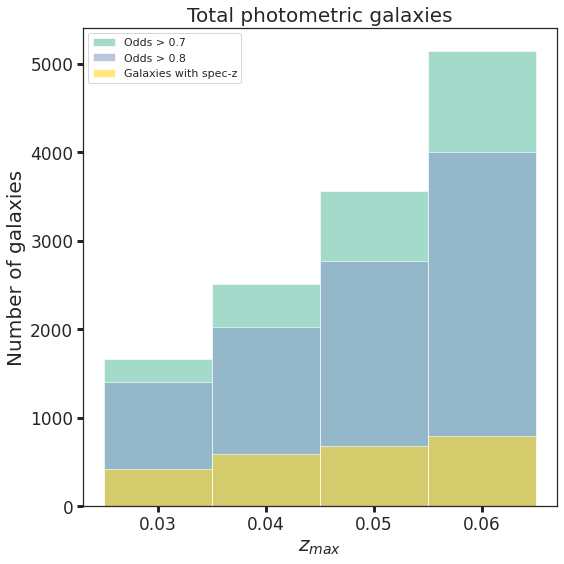

In [37]:
fontsize = 20
labelsize = 17
bar_width = 0.01

colors = plt.cm.Set2(np.linspace(0, 1.0, 4))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.bar(t07["Photo-z_max"], t07["Number of galaxies"], bar_width, color=colors[0], label="Odds > 0.7", alpha=0.6)
ax.bar(t08["Photo-z_max"], t08["Number of galaxies"], bar_width, color=colors[1], label="Odds > 0.8", alpha=0.6)
ax.bar(t07["Photo-z_max"], t07["Galaxies with spec-z"], bar_width, color=colors[2], label="Galaxies with spec-z", alpha=0.6)
ax.set_xlabel(r"$z_{max}$", fontsize=fontsize)
ax.set_ylabel("Number of galaxies", fontsize=fontsize)
ax.set_xticks(t07["Photo-z_max"])
ax.set_title("Total photometric galaxies", fontsize=fontsize)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
ax.legend()

# fig.tight_layout()
# plt.savefig("../Figures/photoz-max_odds_table_v2.pdf", format='pdf')